# **Bank Customer Churn Prediction**

-------------

## **Objective**

To build a predictive model that identifies bank customers who are likely to churn, enabling the bank to take proactive measures to retain them.

## **Data Source**

Dataset URL: [Bank Churn Modeling Dataset](https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv)

## **Import Library**

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## **Import Data**

In [14]:
url = "https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv"
df = pd.read_csv(url)


## **Describe Data**

In [15]:
# Display basic information about the dataset
print("Dataset Sample:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display statistical summary
print("\nStatistical Summary:")
print(df.describe())


Dataset Sample:
   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  Num Of Products  Has Credit Card  Is Active Member  \
0       0.00                1                1                 1   
1   83807.86                1                0                 1   
2  159660.80                3                1                 0   
3       0.00                2                0                 0   
4  125510.82                1                1                 1   

   Estimated Salary  Churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4  

## **Data Visualization**

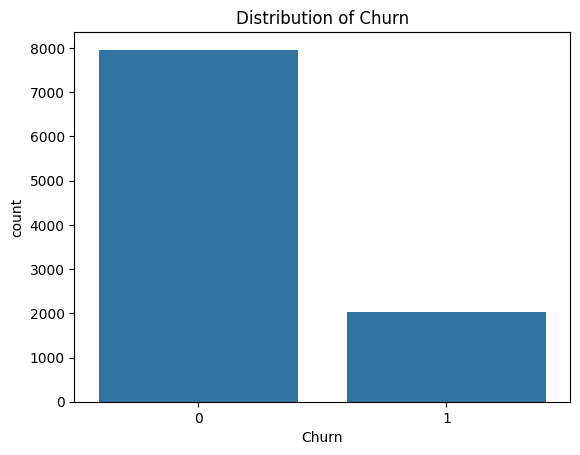

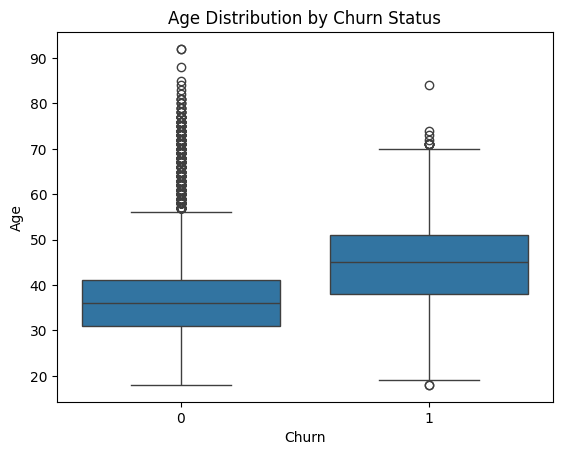

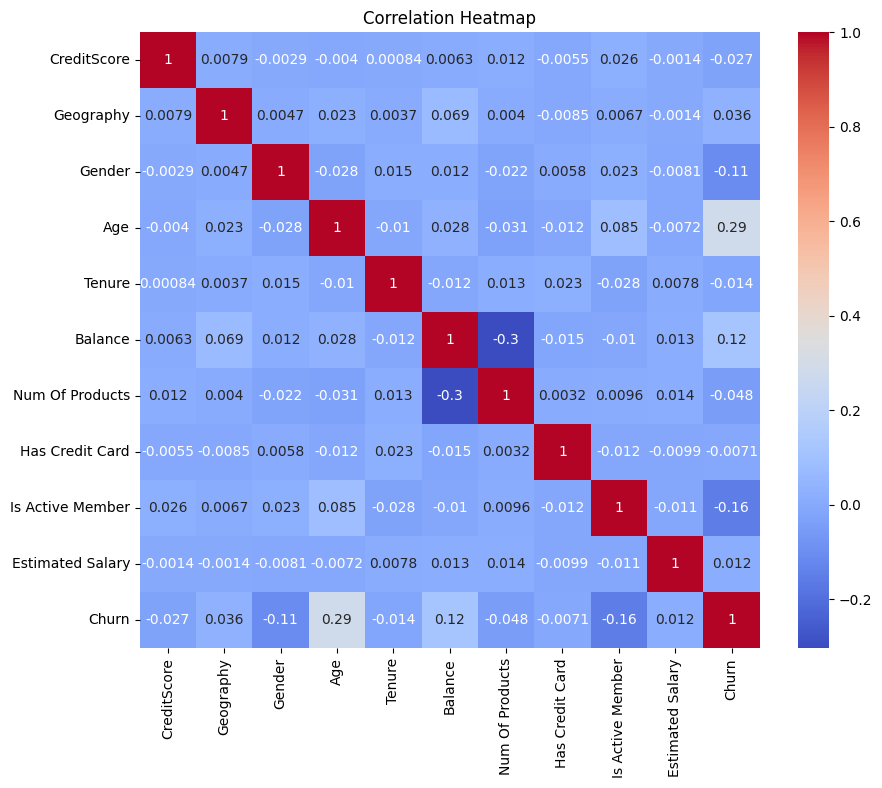

In [16]:
# Visualize the distribution of the target variable
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

# Visualize the relationship between age and churn
sns.boxplot(x='Churn', y='Age', data=df)
plt.title('Age Distribution by Churn Status')
plt.show()

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()
# Encode categorical columns before correlation analysis
df_encoded = df.copy()
df_encoded['Geography'] = label_encoder.fit_transform(df['Geography'])
df_encoded['Gender'] = label_encoder.fit_transform(df['Gender'])

# Drop unnecessary columns
df_encoded = df_encoded.drop(['CustomerId', 'Surname'], axis=1)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



## **Data Preprocessing**

In [17]:
# Drop unnecessary columns
df = df.drop(['CustomerId', 'Surname'], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])


## **Define Target Variable (y) and Feature Variables (X)**

In [18]:
X = df.drop('Churn', axis=1)
y = df['Churn']


## **Train Test Split**

In [19]:
# Handle imbalanced data using SMOTE
print("Original Target Class Distribution:")
print(Counter(y))

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled Target Class Distribution:")
print(Counter(y_resampled))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Original Target Class Distribution:
Counter({0: 7963, 1: 2037})
Resampled Target Class Distribution:
Counter({1: 7963, 0: 7963})


## **Modeling**

In [20]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement Support Vector Machine Classifier with hyperparameter tuning
svm = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.9s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.9s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   6.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   6.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   6.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   6.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.8s
[CV] END ....................C=0.1, gamma=0.1, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

## **Model Evaluation**

In [21]:
# Display the best parameters from GridSearchCV
print("Best Parameters from GridSearchCV:")
print(grid.best_params_)

# Predict on the test set
y_pred = grid.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Best Parameters from GridSearchCV:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1633
           1       0.83      0.85      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186

Confusion Matrix:
[[1362  271]
 [ 235 1318]]
Accuracy Score:
0.8411801632140615


## **Prediction**

In [22]:
# Example prediction
sample_data = np.array([[600, 1, 0, 40, 3, 60000, 2, 1, 1, 50000]])
sample_data_scaled = scaler.transform(sample_data)
prediction = grid.predict(sample_data_scaled)
print("Prediction for sample data:", prediction)


Prediction for sample data: [1]


c:\Users\John Joshua\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Explanation**

In this project, we aimed to predict customer churn using a Support Vector Machine (SVM) model. We handled categorical data encoding, feature scaling, and imbalanced data using SMOTE. The model was optimized using GridSearchCV for hyperparameter tuning, and the final model was evaluated using standard classification metrics. The model can now be used to predict churn on new customer data, helping the bank to identify at-risk customers and reduce churn rates.